In [1]:
import pandas as pd
from fastai.vision.all import *
from fastai.torch_basics import *
from tqdm.auto import tqdm
from PIL import Image

/home/zeroql/webdev/datamind/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = './dataset/train/'
images_path= path + 'images/'
test_path = './dataset/test/images/'
csv_path = path + 'labels.csv'
csv_path

'./dataset/train/labels.csv'

In [5]:
files = get_image_files(images_path)
df = pd.read_csv(csv_path)

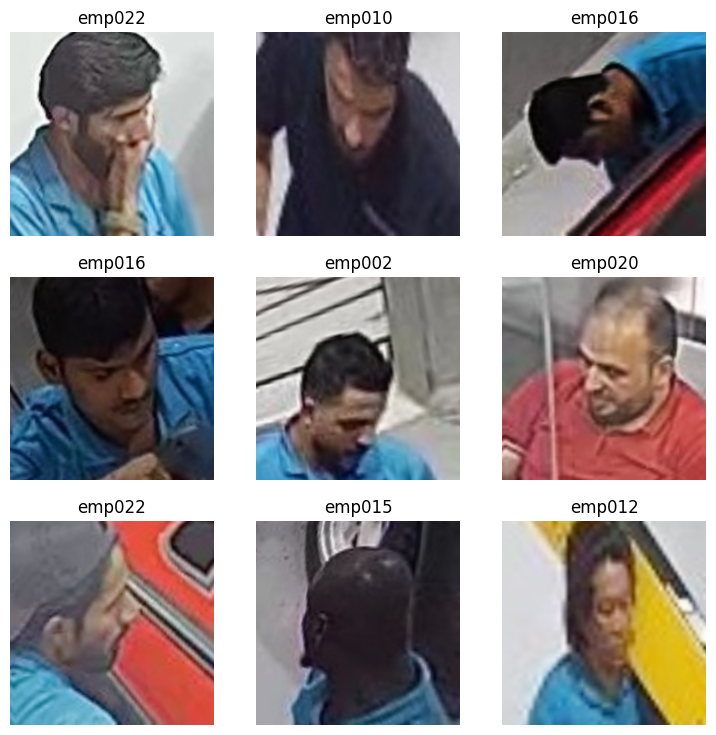

In [6]:
# Create ImageDataLoaders from CSV
dls = ImageDataLoaders.from_csv(
    path='./dataset/train/',
    csv_fname='labels.csv',
    folder='images',
    fn_col='filename',
    label_col='emp_id',
    valid_pct=0.2,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224)
)
# Show batch to verify the data loading
dls.show_batch()

In [7]:
learn = vision_learner(dls, resnet152, metrics=accuracy)
learn.fine_tune(100)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [ ]:
def predict_image(image):
	return learn.predict(test_path+image)[0]
#test_path
results = []

In [ ]:
for image in os.listdir(test_path):
	prediction = dict(filename=image, emp_id=predict_image(image))
	results.append(prediction)

In [ ]:
results_df = pd.DataFrame.from_dict(results)
hi = results_df.drop_duplicates()
hi

In [ ]:
hi.to_csv('submission_100.csv', index=False)